In [ ]:
#The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
!pip install citipy

In [22]:
#Import the dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
from datetime import datetime
from config import weather_api_key
#Import the request lirary
import requests
# Import time module
import time

In [3]:
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Create a set of random latitude and longitude combinations
#where lats= latitudes & lngs = longitudes 
lats = np.random.uniform(low = -90.000 ,high= 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
#there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.
coordinates = list(lat_lngs)

In [5]:
#for coordinate in coordinates:
#    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
        
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
cities

['leningradskiy',
 'illoqqortoormiut',
 'marzuq',
 'cidreira',
 'vila franca do campo',
 'bethel',
 'carnarvon',
 'vaini',
 'longyan',
 'bubaque',
 'hunza',
 'dali',
 'daru',
 'mnogovershinnyy',
 'albany',
 'cape town',
 'rockport',
 'fortuna',
 'ushuaia',
 'champasak',
 'tuktoyaktuk',
 'promyshlennyy',
 'chernyshevskiy',
 'butaritari',
 'calvinia',
 'saint-philippe',
 'tsihombe',
 'ardalstangen',
 'walvis bay',
 'antalaha',
 'mwaro',
 'turan',
 'sentyabrskiy',
 'tasiilaq',
 'muisne',
 'qeshm',
 'waingapu',
 'tolentino',
 'itupiranga',
 'constitucion',
 'mataura',
 'puerto ayora',
 'bathsheba',
 'hobyo',
 'waverley',
 'busselton',
 'samusu',
 'itarema',
 'mys shmidta',
 'punta arenas',
 'port blair',
 'karachi',
 'dikson',
 'port macquarie',
 'east london',
 'bastrop',
 'rikitea',
 'lolua',
 'nome',
 'belushya guba',
 'kapaa',
 'new norfolk',
 'thompson',
 'taolanaro',
 'hobart',
 'manzil jamil',
 'beringovskiy',
 'hithadhoo',
 'richards bay',
 'jamestown',
 'chokurdakh',
 'lalomanu',


In [8]:
#Declera an empty list
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#Creating counters 
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
#This will cause and error because of the cities[i] is giving us the index of the list not the name of each citi
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
#    if ( i % 50 == 0 and i >= 50):
#        record_count = 1
#        set_count += 1 
#         # Create endpoint URL with each city.
#        city_url = url + "&q=" + cities[i] 
#        print(city_url)
    

In [10]:
 cities[3] 

'cidreira'

In [11]:
#For the previous error we can use the enumerate() method to iterate through the list 
# the sintaxis is the foollowing: for i, item in enumerate(list):

# Run an API request for each of the cities.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | leningradskiy
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | marzuq
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | longyan
Processing Record 10 of Set 1 | bubaque
Processing Record 11 of Set 1 | hunza
City not found. Skipping...
Processing Record 12 of Set 1 | dali
Processing Record 13 of Set 1 | daru
Processing Record 14 of Set 1 | mnogovershinnyy
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | rockport
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | champasak
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | promyshlennyy
Processing Record 23 of Set 1 | 

Processing Record 37 of Set 4 | altay
Processing Record 38 of Set 4 | kyaukse
Processing Record 39 of Set 4 | sao filipe
Processing Record 40 of Set 4 | comodoro rivadavia
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | high level
Processing Record 43 of Set 4 | baruun-urt
Processing Record 44 of Set 4 | hovd
Processing Record 45 of Set 4 | noumea
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | aberystwyth
Processing Record 48 of Set 4 | meulaboh
Processing Record 49 of Set 4 | barbar
City not found. Skipping...
Processing Record 50 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 1 of Set 5 | ilheus
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | golden
Processing Record 4 of Set 5 | boueni
Processing Record 5 of Set 5 | eureka
Processing Record 6 of Set 5 | omutinskoye
City not found. Skipping...
Processing Record 7 of Set 5 | bu

City not found. Skipping...
Processing Record 26 of Set 8 | homestead
Processing Record 27 of Set 8 | araioses
Processing Record 28 of Set 8 | bitkine
Processing Record 29 of Set 8 | opuwo
Processing Record 30 of Set 8 | am timan
Processing Record 31 of Set 8 | kirakira
Processing Record 32 of Set 8 | la asuncion
Processing Record 33 of Set 8 | nicoya
Processing Record 34 of Set 8 | lethem
Processing Record 35 of Set 8 | la primavera
Processing Record 36 of Set 8 | hervey bay
Processing Record 37 of Set 8 | mount isa
Processing Record 38 of Set 8 | neiafu
Processing Record 39 of Set 8 | nguiu
City not found. Skipping...
Processing Record 40 of Set 8 | karratha
Processing Record 41 of Set 8 | lazaro cardenas
Processing Record 42 of Set 8 | popondetta
Processing Record 43 of Set 8 | angoche
Processing Record 44 of Set 8 | pimentel
Processing Record 45 of Set 8 | ardakan
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | coahuayana
Processing Record 48 of Set 8 | bu

Processing Record 14 of Set 12 | warrensburg
Processing Record 15 of Set 12 | axim
Processing Record 16 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 17 of Set 12 | bilibino
Processing Record 18 of Set 12 | ulladulla
Processing Record 19 of Set 12 | gizo
Processing Record 20 of Set 12 | saharsa
Processing Record 21 of Set 12 | suriapet
Processing Record 22 of Set 12 | coronado
Processing Record 23 of Set 12 | lucapa
Processing Record 24 of Set 12 | general roca
Processing Record 25 of Set 12 | neepawa
Processing Record 26 of Set 12 | karatau
Processing Record 27 of Set 12 | seda
Processing Record 28 of Set 12 | bellavista
Processing Record 29 of Set 12 | moerai
Processing Record 30 of Set 12 | yamada
Processing Record 31 of Set 12 | kudahuvadhoo
Processing Record 32 of Set 12 | rehoboth
Processing Record 33 of Set 12 | edd
Processing Record 34 of Set 12 | puri
Processing Record 35 of Set 12 | fountain hills
Processing Record 36 of Set 12 | louisbourg
City not found

In [12]:
len(city_data)

564

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leningradskiy,69.3833,178.4167,42.06,76,45,9.80,RU,2021-07-24 00:18:36
1,Marzuq,14.4000,46.4667,68.13,83,100,6.15,YE,2021-07-24 00:19:56
2,Cidreira,-30.1811,-50.2056,59.67,81,0,7.47,BR,2021-07-24 00:17:30
3,Vila Franca Do Campo,37.7167,-25.4333,70.21,89,93,5.88,PT,2021-07-24 00:19:57
4,Bethel,41.3712,-73.4140,74.91,71,75,1.01,US,2021-07-24 00:19:57
5,Carnarvon,-24.8667,113.6333,57.27,66,82,9.22,AU,2021-07-24 00:19:57
6,Vaini,-21.2000,-175.2000,80.76,83,40,5.75,TO,2021-07-24 00:19:58
7,Longyan,25.1072,117.0225,79.97,84,22,2.51,CN,2021-07-24 00:19:58
8,Bubaque,11.2833,-15.8333,79.27,79,100,13.69,GW,2021-07-24 00:19:59
9,Dali,25.7000,100.1833,65.16,89,81,2.13,CN,2021-07-24 00:20:00


In [16]:
order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,2021-07-24 00:18:36,69.3833,178.4167,42.06,76,45,9.80
1,Marzuq,YE,2021-07-24 00:19:56,14.4000,46.4667,68.13,83,100,6.15
2,Cidreira,BR,2021-07-24 00:17:30,-30.1811,-50.2056,59.67,81,0,7.47
3,Vila Franca Do Campo,PT,2021-07-24 00:19:57,37.7167,-25.4333,70.21,89,93,5.88
4,Bethel,US,2021-07-24 00:19:57,41.3712,-73.4140,74.91,71,75,1.01
...,...,...,...,...,...,...,...,...,...
559,Dekar,BW,2021-07-24 00:29:38,-21.5333,21.9333,40.64,28,0,6.73
560,Cascais,PT,2021-07-24 00:29:46,38.6979,-9.4215,66.47,75,1,4.00
561,Timra,SE,2021-07-24 00:29:47,62.4870,17.3257,57.67,67,43,10.36
562,Lichinga,MZ,2021-07-24 00:29:48,-13.3128,35.2406,53.65,88,100,10.27


In [18]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
#-------------------------------City Latitudes VS Max Temperature-------------------------------
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Get today's date in seconds.
today = time.strftime("%x")
today


'07/23/21'

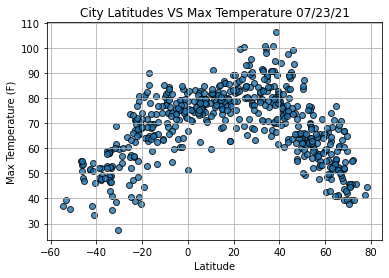

In [34]:
plt.scatter(x = lats, y = max_temps, edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitudes VS Max Temperature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

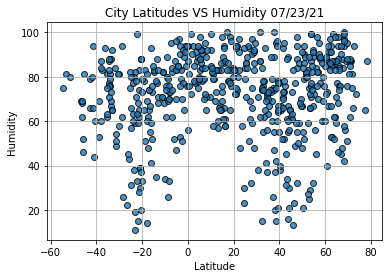

In [35]:
plt.scatter(x = lats, y = humidity, edgecolors= "black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitudes VS Humidity {today}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

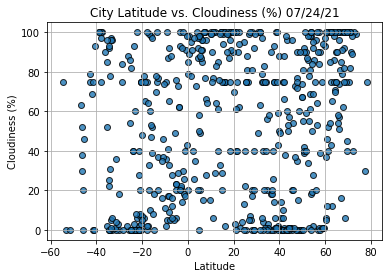

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

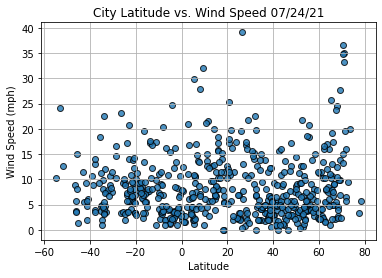

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

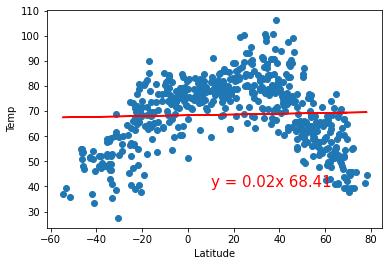

In [45]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats,max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = f"y = {slope:.2f}x {intercept:.2f}"

# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [78]:
#--------------------------Creating a funtion-----------------------
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [54]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,2021-07-24 00:18:36,69.3833,178.4167,42.06,76,45,9.80
1,Marzuq,YE,2021-07-24 00:19:56,14.4000,46.4667,68.13,83,100,6.15
3,Vila Franca Do Campo,PT,2021-07-24 00:19:57,37.7167,-25.4333,70.21,89,93,5.88
4,Bethel,US,2021-07-24 00:19:57,41.3712,-73.4140,74.91,71,75,1.01
7,Longyan,CN,2021-07-24 00:19:58,25.1072,117.0225,79.97,84,22,2.51


In [56]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Cidreira,BR,2021-07-24 00:17:30,-30.1811,-50.2056,59.67,81,0,7.47
5,Carnarvon,AU,2021-07-24 00:19:57,-24.8667,113.6333,57.27,66,82,9.22
6,Vaini,TO,2021-07-24 00:19:58,-21.2000,-175.2000,80.76,83,40,5.75
10,Daru,PG,2021-07-24 00:20:00,-9.0763,143.2092,78.91,80,100,9.04
13,Cape Town,ZA,2021-07-24 00:20:02,-33.9258,18.4232,49.12,88,0,3.44


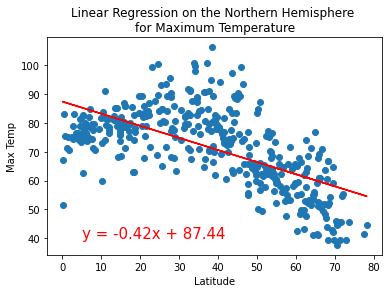

In [86]:
# ------------------------Linear regression on the Northern Hemisphere Max Temperature-------------------
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", "Max Temp", (5,40))

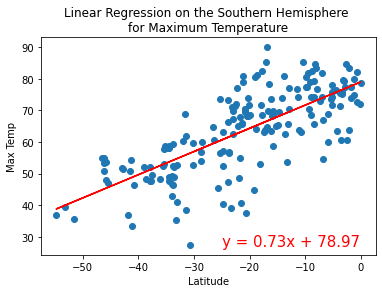

In [87]:
# ------------------------Linear regression on the Southern Hemisphere Max Temperature-------------------
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", "Max Temp", (-25,27))

In [69]:
#The correlation between the latitude and the maximum temperature is strong to very strong 
#because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere,
#as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
#And when we are furtherfrom the equator the temperatures become cooler. Check the r-values for your plots. 

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
r_value

0.7345385238922655

In [70]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
r_value

-0.6366263126397942

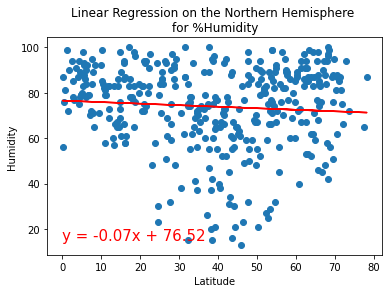

In [92]:
# ------------------------Linear regression on the Northern Hemisphere Humidity-------------------
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor %Humidity", "Humidity", (0,15))

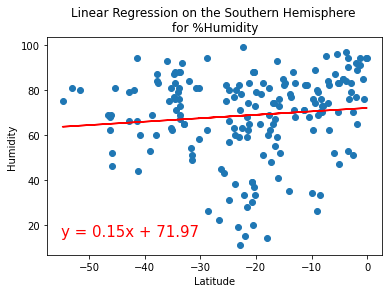

In [91]:
# ------------------------Linear regression on the Southern Hemisphere Humidity-------------------
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor %Humidity", "Humidity", (-55,15))

In [93]:
#The correlation between the latitude and percent humidity is very low because the 
#r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. 
#This means that percent humidity is unpredictable due to changing weather patterns that can 
#increase or decrease percent humidity. Check the r-values for your plots. 
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
r_value

-0.0752580481049525

In [94]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
r_value

0.10507704200620016

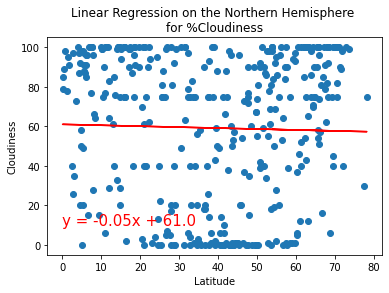

In [99]:
# ------------------------Linear regression on the Northern Hemisphere Cloudeness-------------------
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor %Cloudiness", "Cloudiness", (0,10))

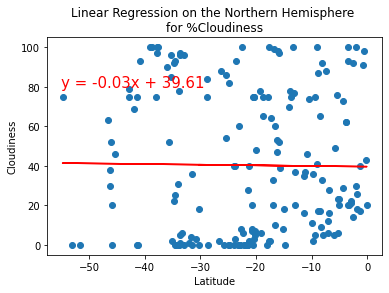

In [114]:
# ------------------------Linear regression on the Southern Hemisphere Cloudeness-------------------
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor %Cloudiness", "Cloudiness", (-55,80))

In [115]:
#The correlation between the latitude and percent cloudiness is very low because 
#the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for
#the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable 
#due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
r_value

-0.0262522174599962

In [116]:
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
r_value

-0.011900740923118498

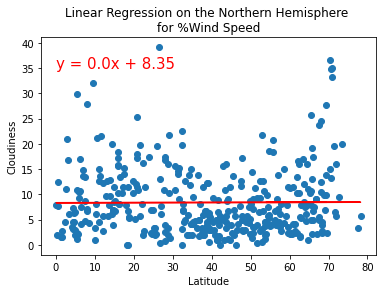

In [119]:
# ------------------------Linear regression on the Northern Hemisphere Wind Speed-------------------
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor %Wind Speed", "Cloudiness", (0,35))

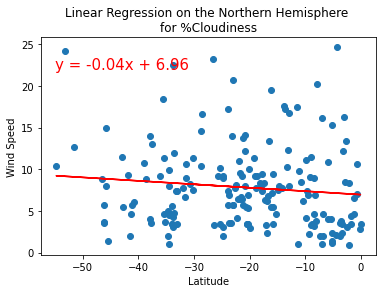

In [125]:
# ------------------------Linear regression on the Southern Hemisphere Wind Speed-------------------
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor %Cloudiness", "Wind Speed", (-55,22))

In [126]:
#The correlation between the latitude and wind speed is very low because the r-value is less 
#than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots 
#shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase 
#or decrease wind speed. Check the r-values for your plots.
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
r_value

-0.10955217253988656

In [127]:
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
r_value

0.003934682994795621